## Modifiziertes SIR Modell
(von Anna Hundertamrk)

In diesem Skript wird das modifizierzte SIR Modell für den Fall der unvollständig erfassten Infizierten und der Verlangsammung der Infektionsrate Imfolge von Kontakt-reduzierenden Maßnahmen angewendet. Das Ziel dieser Modifizierung  ist  die Anpassung  an die von RKI ermittelten tatsächtlichen Zahlen der Corona Infizierten in Deutschland.

Inspiriert von der Studie
 https://www.medrxiv.org/content/10.1101/2020.03.26.20044214v1.full.pdf

 
S:succesible
I:Infected
R:Recovered
\begin{eqnarray}
S'(t)&=&-\frac{c(t)}{rN}S(t)I(t)\\
I'(t)&=&\frac{c(t)}{N}S(t)I(T)-wI(t)\\
R'(t)&=&wI(t)- dI(t)\\
\end{eqnarray}
hier $N$ ist die Kapazitätsgrenze (Befölkerung die sich insgesammt ansteckt),  $c(t)=c_0 slowdown(t)$ ist die zeitabängige  Infektionsrate, $c_0$- die Basisinfektionsrate (die des exponenziellen Wachstum zum Anfang der Epidemie), $w=1/14$ ist die tägliche  Wechselrate  von der Gruppe der Infizierten in die  Gruppe der Genesenen (oder Toten), (14 Tage Genesungszeit) und $d=0.003$ ist die Todesrate.

Es gilt hier der Erhaltungsgesetz $S'+\frac{I'}{r}+\frac{R'}{r}=-dI$.
Bei   $d=0$ (werden Toten in der Gruppe R der Genesenen mitgezählt)  folgt $S+\frac{I}{r}+\frac{R}{r}=N$.
Bei $r=1$ erhalten wir das original SIR Modell.



In [37]:
%Parameter des SIR Models
NM=55000 % Kapazitätsgrenze, 2/3 der deutschen Befölkerung

c=0.32450 %Basisinfektionsrate- die Rate des exponenziellen Wachstums am Anfang der Pandemie
w=1/14; % Wechselrate zu den Genesenen
d=0.003 % Todesrate
%Anteil der erfassten Infizierten
r=0.1

NM =  55000


c =  0.32450


d =  0.0030000


r =  0.10000


Die Funktion 'coronaData' übergibt die vom RKI ermittelten  täglichen Daten zu Corona-Infizierten in Deutschland seit 26. Februar 2020.
In der Ersten Zeile der Rückgabe-Matrix werden die kummulierten Infizierten, in der zweiten Zeile werden die Todesfälle und in dritten Zeile werden die Genesenen Infizierten gespeichert

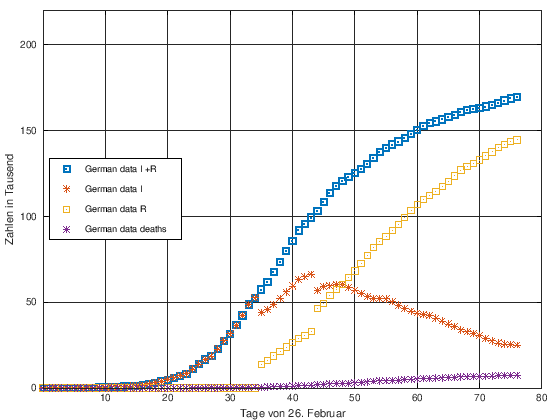

In [38]:
%%aktuelle Daten: (passen nicht mehr zur exponenzieller Funktion)
 A=coronaData();
 inf_falleWHO=A(1,:);
  inf_falleWHOrecovered=A(3,:);
 inf_falleWHOtoten=A(2,:);
 
 inf_falleWHOaktuell=inf_falleWHO-inf_falleWHOrecovered;
 n=length(inf_falleWHO);
 timesWHO=[0:1:n-1];
 
 figure(1)
  
 title ('Corona- infizierten Detuschland, Quelle RKI')
   plot (timesWHO, inf_falleWHO./1000, 's', "linewidth",4, timesWHO,inf_falleWHOaktuell/1000, '*' , timesWHO,inf_falleWHOrecovered/1000,'s',  timesWHO, inf_falleWHOtoten./1000 , '*' )
   xlabel ('Tage von 26. Februar')
   ylabel ('Zahlen in Tausend')
   legend ( "German data I +R" ,"German data I ","German data R", "German data deaths" ,"location", "west")
   grid on
   xticks([10,20,30,40,50,60,70,80])
    
   axis([0,80, 0 ,220]) 

### Verlangsammte Infektionsrate
Hier kann man die zeitabhängige Infektionsrate Imfolge  der Maanaßhmen der Kontaktreduzierung implementieren.

Zur Errinerrung (stimmt es?, korrigieren Sie)

1. Kontaktverbot am 22. März (Tag 26)
2. Schulschließung am 15. März (Tag 19)
3. Lockerung der Maßnahmen ab April 27.



In [26]:
function val=slowdown(x,t)
% Ab Tag t (Argument der Funktion) wir die Infektionsrate  in mehrereb Schritten sinken:
if x<t val=1 ; else  if x<t +10 val=t./(x.^1.05); else if x<t +22 val=t./(x.^1.2); else val=t./(x.^1.27)  ;
endif
endif
endif
%Beispielhafte Lockerung der Maßnahmen ab Tag 80, die die Infektionsrate wieder auf 50 % der Basisinfektionsrate erhöht
%(um den Effekt der Lockerung zu beobachten)
if x> 80  val=0.5; endif
endfunction


#### Vergleich  der tatsächtlicher Infektionsrate $c_{Data}$ mit der 'slowdown' Funktion

Im folgenden wir die Infektionsrate $c_{Data}(t)$ aus den RKI- Daten berechnet:
$$c_{Data}(t)=\frac{I_{RKI}(t)-I_{RKI}(t-1)}{ I_{RKI}(t-1)}, $$
wobei $I_{RKI}(t)$ die kummulative Anzahl der Infizerten (RKI-Data) bezeichnet, $t$- Zeit in Tagen.

Die Verlangsammung der Infektionsrate ab Tag $25$-21. März:

T =  1


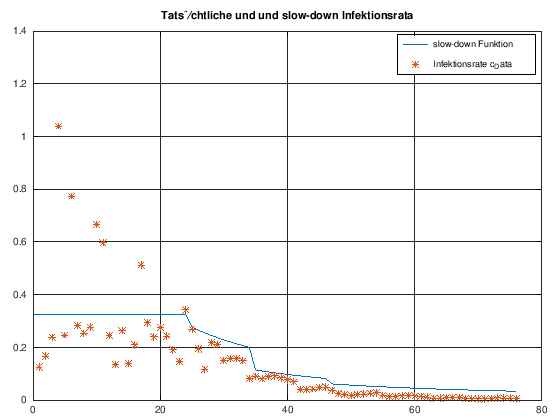

In [6]:
%Slowdown-Funktion
for i=1:length(timesWHO)
cc(i)=slowdown (timesWHO (i), 25)*c;
endfor 
plot  (timesWHO,cc)
hold on 

%infektionsrate aus den RKI-Daten berechnet:
T=1
ccc(1)=cc(1);
for i=T+1:n
ccc(i-T)=(inf_falleWHO(i)-inf_falleWHO(i-T))/(inf_falleWHO(i-T) );
endfor

plot (ccc, '*')
grid on
title ('Tatsächtliche und und slow-down Infektionsrata')
legend ('slow-down Funktion', 'Infektionsrate c_Data' )
hold off

   ### Numerische Lösung des SIR -Systems
   Die Octave Funktion 'lsode'  löst ein System gewöhnlicher Differentialgleichungen mit adequaten numerischen Methoden.
   
  'lsode'  übernimmt als Parameter den Namen der Funktion $f$ der rechten Seite des  System der gewönlicher Differentialgleichungen:  
   $$\vec{y}'=f(\vec{y},t), \quad  t\in [t_0,T], \ \vec{y}(t)=(y_1(t),y_2(t),y_3(t))^T,$$ 
   den Anfangsvektor yo:=$y(t_0)=(y_1(t),y_2(t),y_3(t))^T$ und den Vektor der Zeitschritte 'times':=$(t_1,..,t_n=T)$ in den die Lösung berechnet werden sollte.

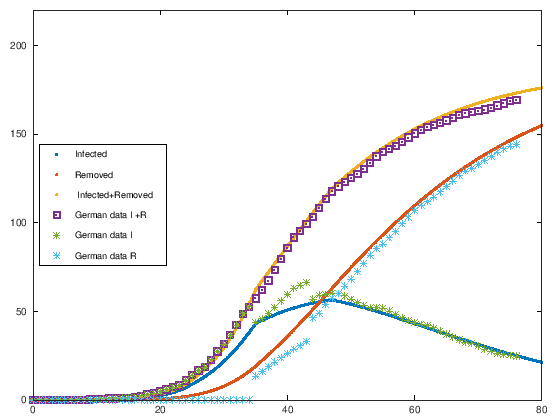

In [27]:
%Lösung des ODE Systems

 times=(0:0.1:180);
 
  %Anfangsbedingungen
    yo=[NM-16/1000;16/1000;0];
    
    f=@(y,x) [-c*slowdown(x,25)*y(1)*y(2)/(r*NM);c*slowdown(x,25)*y(1)*y(2)/NM-w*y(2);w*y(2)-0*y(2)];
    y = lsode (f, yo, times);
   
  figure(2)
   plot ( times, y (:,2), '.', times, y (:,3),'.',times, y (:,3)+y (:,2),'.')
   hold on
 
   plot (timesWHO, inf_falleWHO./1000, 's', "linewidth",4, timesWHO,inf_falleWHOaktuell/1000, '*' , timesWHO,inf_falleWHOrecovered/1000, '*' )
   legend ( "Infected", "Removed", " Infected+Removed","German data I +R" ,"German data I ","German data R" ,"location", "west")
    
   axis([0,80, 0 ,220])  

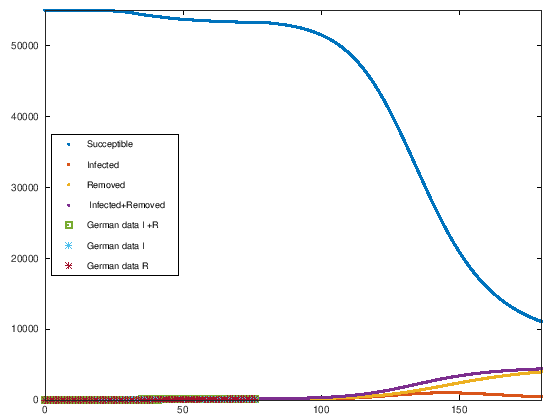

In [28]:
figure(3)
   plot ( times, y (:,1), '.', times, y (:,2), '.', times, y (:,3),'.',times, y (:,3)+y (:,2),'.')
   hold on
 
   plot (timesWHO, inf_falleWHO./1000, 's', "linewidth",4, timesWHO,inf_falleWHOaktuell/1000, '*' , timesWHO,inf_falleWHOrecovered/1000, '*' )
   legend ( "Succeptible","Infected", "Removed", " Infected+Removed","German data I +R" ,"German data I ","German data R" ,"location", "west")
   axis([0,180, 0 ,55020])

 Im folgender Zelle wird der relativer Fehler der numerischen Lösung des SIR Models (Gruppen I, R) zu den RKI Daten  berechnet.  Es werden verschieden Maßen des fehlers berechnet.

maas_I =  0.10225


rel_I_mean =  0.15662


maas_R =  0.10994


rel_R_mean =  0.18429


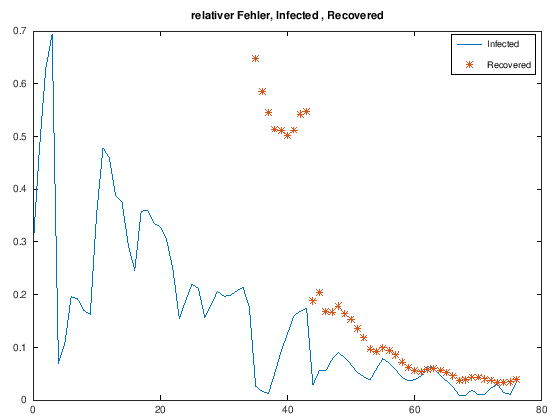

In [36]:
%relat. Fehler Infizierte

%Interpolation der Funktionswerte an die RKI-Zeiten (Tage)
I=interp1 (times, y(:,2), timesWHO+1);
abs_I=abs(I-inf_falleWHOaktuell/1000);
rel_I=abs(I-inf_falleWHOaktuell/1000)./(inf_falleWHOaktuell/1000);

plot (timesWHO, rel_I)
title ('relativer Fehler, Infected , Recovered')
hold on
%Fehlermaß
maas_I=norm(abs_I)/norm(inf_falleWHOaktuell/1000)
%weiterer  Fehlermaß Durchschnitt und Euklid-Norm
rel_I_mean=mean(rel_I)
rel_I_norm=norm(rel_I);

%relat. Fehler Genesene/Toten
R=interp1 (times, y(:,3), timesWHO+1);
abs_R=abs(R-inf_falleWHOrecovered/1000);
rel_R=abs(R-inf_falleWHOrecovered/1000)./(inf_falleWHOrecovered/1000);

plot (timesWHO, rel_R, '*')
hold off
legend('Infected', 'Recovered')
%Fehlermaß
maas_R=norm(abs_R)/norm(inf_falleWHOrecovered/1000)
% weiterer Fehlermaß: Durchschnitt und Euklid-Norm
rel_R_mean=mean(rel_R(36:length(timesWHO)))
rel_R_norm=norm(rel_R(36:length(timesWHO)));

### Aufgaben zur selbständiger Arbeit 
1. Wählen Sie eine geeignete Basis-Infektionsrate c, die das Exponenzielle Wachstum (ca bis Ende April 2020) 'gut' abbildet. Vergleichen Sie dazu die Funktion des exponenziellen Wachstums $I(t)=I_0e^{k*(t-t_0)}$,  hier  $k=c/N$ aus SIR-Modell, mit den Daten  des RKI zu den Infizierten in Deutschland 

Hinweis: verwenden Sie 'Augenmaß' oder  besser die Regression, d.h. finden Sie die Infektionsrate k, die das Residuum $\sum_{i=1}^n (I^i_{RKI}-I(t_i))^2$ minimiert.

2. Schlagen Sie eine andere 'slowdown2' Funktion zur Verlangsammung der Infektionsrate im Einklang  mit den der Kontaktverbot- und Lockerungsmaßnahmen und nutzen Sie diese im SIR Modell (Infektionsrate 'c*slowdown2'). Experimentieren Sie und versuchen Sie das obere Ergebniss des SIR Modells mit 'slowdown2' zu verbessern (betrachten Sie dazu den relat. Fehler)

3. Untersuchen Sie anhand  Ihres SIR Modells, welchen Einfluß ein Anstieg der Infektionsrate (nachdem diese durch die Maßnahmen reduziert wurde) im Folge der Lockerung der Kontaktverbotmaßnahmen an die Infizerten-Zahlen hat.

4. Mithilfe des SIR Modells ohne  Verlangsammung der Infektionsrate (ohne slowdown) stellen Sie ein Szenario der Pandemie in Deutschland dar, welches potenziell ohne die Kontaktreduzierende Maßnahmen auftreten konnte. 
5. Welchen Einfluß hat Parameter r in dieser Modellierung? (Untersuchen Sie  die Fälle $r<1$ und $r=1$)


In [30]:
function val=slowdown2(x,t)
....
endfunction